# Academic Writing - Interactive Essay
### Nadia Chwarszczyńska

The aim of this paper is to examine if the Lesk algorithm for Word Sense Disambiguation is effective. The words, which will be investigated in this research, are displayed in bold. The following examples are taken from a local file and scraped by BeautifulSoup: 
1. It was a fair __deal__ so both of us went away happy.

2. You have to __water__ your animals.

3. Chess openings for __black__ are the means to get at first equality and then to win.

4. Let's sit down on the sandy river __bank__.

5. She missed a lot of days of __school__.

In [1]:
import requests

The first step is to scrape the text and find all the paragraphs using BeautifulSoup.

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(open("C:/Users/nadii/OneDrive/Desktop/plik.html", encoding="utf8"), "html.parser")
paras = soup.find_all('p')

Once the paragraphs have been extracted, the empty or whitespace-only texts are removed. The remaining content of the file is stored in the only_text list. 

In [3]:
only_text = []
for el in paras:
    if len(el.getText().strip()) > 0:
        only_text.append(el.getText())
print(only_text)

[' 1. It was a fair deal so both of us went away happy. ', ' 2. You have to water your animals. ', ' 3. Chess openings for black are the means to get at first equality and then to win. ', " 4. Let's sit down on the sandy river bank. ", ' 5. She missed a lot of days of school. ']


Subsequently, the Natural Language Toolkit (NLTK) library is used to perform tokenization and part-of-speech (POS) tagging on the sentences stored in the list of tuples. Each tuple contains a word and its corresponding POS tag.

In [4]:
import nltk 

tuples = []
for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tuples.append(item)
print(tuples)

[('1', 'CD'), ('.', '.'), ('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('fair', 'JJ'), ('deal', 'NN'), ('so', 'IN'), ('both', 'DT'), ('of', 'IN'), ('us', 'PRP'), ('went', 'VBD'), ('away', 'RB'), ('happy', 'JJ'), ('.', '.'), ('2', 'CD'), ('.', '.'), ('You', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('water', 'NN'), ('your', 'PRP$'), ('animals', 'NNS'), ('.', '.'), ('3', 'LS'), ('.', '.'), ('Chess', 'NNP'), ('openings', 'NNS'), ('for', 'IN'), ('black', 'JJ'), ('are', 'VBP'), ('the', 'DT'), ('means', 'NNS'), ('to', 'TO'), ('get', 'VB'), ('at', 'IN'), ('first', 'JJ'), ('equality', 'NN'), ('and', 'CC'), ('then', 'RB'), ('to', 'TO'), ('win', 'VB'), ('.', '.'), ('4', 'CD'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('sit', 'VB'), ('down', 'RP'), ('on', 'IN'), ('the', 'DT'), ('sandy', 'JJ'), ('river', 'NN'), ('bank', 'NN'), ('.', '.'), ('5', 'CD'), ('.', '.'), ('She', 'PRP'), ('missed', 'VBD'), ('a', 'DT'), ('lot', 'NN'), ('of', 'IN'), ('days', 'NNS'), ('of', 'IN'), ('school', 'NN'), ('.', '.')]


In this code snippet, the Lesk function from the Word Sense Disambiguation (WSD) module of the NLTK library is imported. WSD aims to determine the intended meaning of a word in context. Additionally, Lesk is supported by WordNet, which is a huge lexical resource that associates words with their semantic relationships and senses. In WordNet, sets of synonymous words are represented by "synsets", which form the nodes of a semantic network. Below, the Lesk function is used to disambiguate the meaning of the target word in the given context by providing the most appropriate synset (sense) from WordNet.

The first analysed word is *deal*. 

In [20]:
from nltk.wsd import lesk
sent=tuples 
#I've tried to write examples like this: sent=['It' 'was' 'a' 'fair' 'deal'...] to check if it changes the outcome, but it doesn't
print(lesk(sent, 'deal', 'n'))

Synset('softwood.n.01')


According to the Lesk function, the sense of the word *deal* in the first sentence is synonymous with the *softwood* synset: "wood that is easy to saw"<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1). However, the correct answer would be the first synset *deal* with the following meaning: "a particular instance of buying or selling". Hence, the Lesk function did not manage to determine the word sense correctly.

<a name="cite_note-1"></a>1. [^](#cite_ref-1) All the definitions of *deal* synsets are given below.


In [21]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('deal'):
    print(ss, ss.definition())

Synset('deal.n.01') a particular instance of buying or selling
Synset('bargain.n.01') an agreement between parties (usually arrived at after discussion) fixing obligations of each
Synset('batch.n.02') (often followed by `of') a large number or amount or extent
Synset('deal.n.04') a plank of softwood (fir or pine board)
Synset('softwood.n.01') wood that is easy to saw (from conifers such as pine or fir)
Synset('hand.n.06') the cards held in a card game by a given player at any given time
Synset('deal.n.07') the type of treatment received (especially as the result of an agreement)
Synset('deal.n.08') the act of distributing playing cards
Synset('deal.n.09') the act of apportioning or distributing something
Synset('cover.v.05') act on verbally or in some form of artistic expression
Synset('consider.v.03') take into consideration for exemplifying purposes
Synset('deal.v.03') take action with respect to (someone or something)
Synset('cope.v.01') come to terms with
Synset('distribute.v.01') 

Another word examined in this paper is the verb *to water*. Interestingly, it was classified mistakenly as a noun by the POS tagger. 

In [22]:
sent=tuples 
print(lesk(sent, 'water', 'v'))

Synset('water.v.04')


The Synset('water.v.04') indicates that the algorithm has selected the sense of *water* as a verb with the meaning "fill with tears". Nevertheless, in the sentence: "You have to water your animals.", the verb refers to the action of providing someone with water. Hence, this sense corresponds to the second synset, i.e., 'water.v.02'. 

In [23]:
for ss in wn.synsets('water'):
    print(ss, ss.definition())

Synset('water.n.01') binary compound that occurs at room temperature as a clear colorless odorless tasteless liquid; freezes into ice below 0 degrees centigrade and boils above 100 degrees centigrade; widely used as a solvent
Synset('body_of_water.n.01') the part of the earth's surface covered with water (such as a river or lake or ocean)
Synset('water.n.03') once thought to be one of four elements composing the universe (Empedocles)
Synset('water_system.n.02') a facility that provides a source of water
Synset('urine.n.01') liquid excretory product
Synset('water.n.06') a liquid necessary for the life of most animals and plants
Synset('water.v.01') supply with water, as with channels or ditches or streams
Synset('water.v.02') provide with water
Synset('water.v.03') secrete or form water, as tears or saliva
Synset('water.v.04') fill with tears


The consecutive word examined in this paper is *black*. The exemplary sentence was taken from the website about [chess openings strategies](https://chess-teacher.com/chess-openings-for-black/). Although in this context *black* is a noun, it was tagged as an adjective by the POS tagger. 

In [24]:
sent=tuples
print(lesk(sent, 'black', 'n'))

Synset('total_darkness.n.01')


Unfortunately, the synset provided by the Lesk algorithm is again incorrect. The sense of the noun *black* proposed by the Lesk function is "total absence of light". The word *black* in the sentence is used with reference to chess. That is why it would match only to the sixth synset, namely 'black.n.06', which refers specifically to board games. 

In [25]:
for ss in wn.synsets('black'):
    print(ss, ss.definition())

Synset('black.n.01') the quality or state of the achromatic color of least lightness (bearing the least resemblance to white)
Synset('total_darkness.n.01') total absence of light
Synset('black.n.03') British chemist who identified carbon dioxide and who formulated the concepts of specific heat and latent heat (1728-1799)
Synset('black.n.04') popular child actress of the 1930's (born in 1928)
Synset('black.n.05') a person with dark skin who comes from Africa (or whose ancestors came from Africa)
Synset('black.n.06') (board games) the darker pieces
Synset('black.n.07') black clothing (worn as a sign of mourning)
Synset('blacken.v.01') make or become black
Synset('black.a.01') being of the achromatic color of maximum darkness; having little or no hue owing to absorption of almost all incident light
Synset('black.a.02') of or belonging to a racial group having dark skin especially of sub-Saharan African origin; - Martin Luther King Jr.
Synset('black.s.03') marked by anger or resentment or 

*Bank* is the next noun investigated in this paper. 

In [26]:
sent=tuples
print(lesk(sent, 'bank', 'n'))

Synset('savings_bank.n.02')


The outcome suggests that the algorithm has made an incorrect match yet again. According to the Lesk function, the second synset - 'savings_bank.n.02' - corresponds to the sense of the noun in the exemplary sentence. Nevertheless, the correct choice would be the first synset with the following meaning "sloping land (especially the slope beside a body of water)". It should have been easily recognised by the algorithm because of the context of the sentence (*bank* is preceded by such words as "sandy" and "river").

In [31]:
for ss in wn.synsets('bank'):
    print(ss, ss.definition())

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

Finally, the last word analysed in this paper is *school*. The sentence: "She missed a lot of days of school" was taken from WordNet and modified slightely<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2). 

<a name="cite_note-2"></a>2. [^](#cite_ref-2) The sentence provided by WordNet: "he didn't miss a single day of school".

In [32]:
sent=tuples
print(lesk(sent, 'school', 'n'))

Synset('school.n.07')


Even though the sentence was very similar to the one displayed on WordNet, it is interpreted incorrectly by the Lesk function. The proposed synset refers to "a large group of fish", whereas in the provided sentence, the word means simply "the period of instruction in school". The correct sense corresponds to the fifth synset. 

In [33]:
for ss in wn.synsets('school'):
    print(ss, ss.definition())

Synset('school.n.01') an educational institution
Synset('school.n.02') a building where young people receive education
Synset('school.n.03') the process of being formally educated at a school
Synset('school.n.04') a body of creative artists or writers or thinkers linked by a similar style or by similar teachers
Synset('school.n.05') the period of instruction in a school; the time period when school is in session
Synset('school.n.06') an educational institution's faculty and students
Synset('school.n.07') a large group of fish
Synset('school.v.01') educate in or as if in a school
Synset('educate.v.03') teach or refine to be discriminative in taste or judgment
Synset('school.v.03') swim in or form a large group of fish


Surprisingly, the Lesk function did not manage to provide the correct synset for any of the given words. It seems that the algorithm has issues even with the most basic examples.  

The results are shown on the pie chart and in the table. 

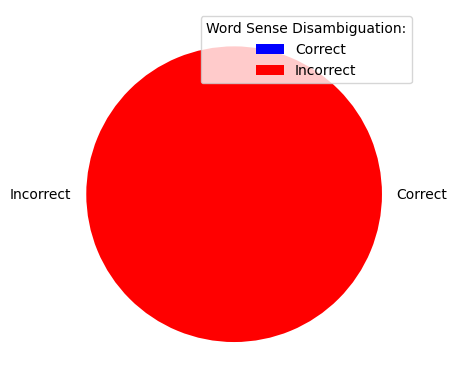

In [34]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([0, 5])
mylabels = ["Correct", "Incorrect"]
mycolors = ["blue", "red"]

plt.pie(y, labels = mylabels, colors=mycolors)
plt.legend(title = "Word Sense Disambiguation:")
plt.show() 

| Id |  Word  | Correct WSD? |
|:--:|:------:|:------------:|
| 1. |  deal  |      no      |
| 2. |  water |      no      |
| 3. |  black |      no      |
| 4. |  bank  |      no     |
| 5. | school |      no      |
|    | Total  |      0%     |

To sum up, the Lesk function proved to be ineffective in Word Sense Disambiguation. In the paper, I have examined four nouns and one verb. The Lesk algorithm failed to determine the word sense in all of these cases. Moreover, some words, namely *black* and *water*, were classified mistakenly by the POS tagger. 